# Utledning av Bertrand med python og sympy

Laster nødvendige pakker:

In [1]:
from sympy import *
from matplotlib import pyplot as plt
import numpy as np

In [2]:
P1, P2, a1, a2, b_11, b_12, b_21, b_22=symbols('P1 P2 a1 a2 b_11 b_12 b_21 b_22',positive=True)

def Q_demand(P_self, P_other, a, b_self, b_other):
    return a-b_self*P_self+b_other*P_other

def profit(P_self, P_other, a, b_self, b_other):
    Q=Q_demand(P_self, P_other, a, b_self, b_other)
    return Q*P_self

display(Q_demand(P1, P2, a1, b_11, b_12))
display(  profit(P1, P2, a1, b_11, b_12))

-P1*b_11 + P2*b_12 + a1

P1*(-P1*b_11 + P2*b_12 + a1)

Marginalinntekt:

In [3]:
d_profit_P1=diff(profit(P1,P2,a1, b_11, b_12),P1)
d_profit_P2=diff(profit(P2,P1,a2, b_21, b_22),P2)

display(d_profit_P1)
display(d_profit_P2)

-2*P1*b_11 + P2*b_12 + a1

P1*b_22 - 2*P2*b_21 + a2

Førsteordensbetingelse:

In [4]:
foc1=Eq(d_profit_P1,0)
foc2=Eq(d_profit_P2,0)

display(foc1)
display(foc2)

Eq(-2*P1*b_11 + P2*b_12 + a1, 0)

Eq(P1*b_22 - 2*P2*b_21 + a2, 0)

Løser:

In [5]:
sol=solve([foc1,foc2],[P1,P2])

display(sol[P1])
display(sol[P2])

(2*a1*b_21 + a2*b_12)/(4*b_11*b_21 - b_12*b_22)

(a1*b_22 + 2*a2*b_11)/(4*b_11*b_21 - b_12*b_22)

Løsningsfunksjon:

In [6]:
bertrand=lambdify(
    (a1, a2, b_11, b_12, b_21, b_22), 
    (sol[P1],sol[P2])
)

Responskurver:

In [7]:
R1=solve(foc1,P1)
R2=solve(foc2,P1)

R1=lambdify(
    (P2, a1, b_11, b_12), 
    R1[0]
)

R2=lambdify(
    (P2, a2, b_21, b_22), 
    R2[0]
)

display(R1(P2, a1, b_11, b_12))
display(R2(P2, a2, b_21, b_22))

(0.5*P2*b_12 + 0.5*a1)/b_11

(2*P2*b_21 - a2)/b_22

Plotter

Definerer parametrene i modellen

In [25]:
p = np.linspace(0,90,100)

a1_value=400
b_11_value=4
b_12_value=2

a2_value=240
b_21_value=3
b_22_value=1.5

Plotter:

Løsningen er følgende: 
Bedrift 1 produserer 256.0 til pris 64.0
Bedrift 2 produserer 168.0 til pris 56.0

Bedrift 1 tjener 16384.0
Bedrift 2 tjener 9408.0


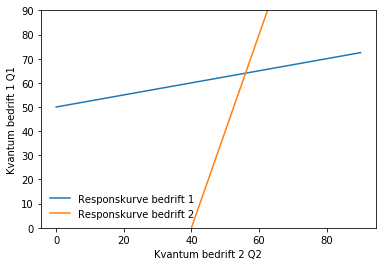

In [26]:


fig,ax=plt.subplots()
ax.set_ylabel('Kvantum bedrift 1 Q1')
ax.set_xlabel('Kvantum bedrift 2 Q2')


#drawing respons curves
ax.plot(p,
        R1(p, a1_value, b_11_value, b_12_value),
        label='Responskurve bedrift 1'
       )

ax.plot(p,
        R2(p, a2_value, b_21_value, b_22_value),
        label='Responskurve bedrift 2'
       )

#setting range for y-axis. 
plt.ylim((0,90))

#adding legend:
ax.legend(loc='lower left',frameon=False)

P1sol, P2sol=bertrand(a1_value, a2_value, b_11_value, b_12_value, b_21_value, b_22_value)

print(f"""Løsningen er følgende: 
Bedrift 1 produserer {Q_demand(P1sol, P2sol, a1_value,b_11_value, b_12_value)} til pris {P1sol}
Bedrift 2 produserer {Q_demand(P2sol, P1sol, a2_value,b_21_value, b_22_value)} til pris {P2sol}

Bedrift 1 tjener {profit(P1sol, P2sol, a1_value,b_11_value, b_12_value)}
Bedrift 2 tjener {profit(P2sol, P1sol, a2_value,b_21_value, b_22_value)}""")